In [1]:
import json
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline

In [2]:
file_in = r"C:\Users\hoek.HKV\Desktop\locations_acacia.json"

In [4]:
with open(file_in, 'r') as f:
    json_in = json.load(f)

In [50]:
locs = []
xs = []
ys = []
latestTimes = []
for loc in json_in['results']:
    locs.append(loc['id'])
    xs.append(loc['location']['coordinates'][0])
    ys.append(loc['location']['coordinates'][1])
    try:
        latestTimes.append(loc['latest']['time'])
    except:
        latestTimes.append("") 

In [51]:
df = pd.DataFrame(
    {'locId': locs,
     'lat': ys,
     'lon': xs,
     'latestTime': latestTimes
    })

In [52]:
df.head()

,locId,lat,lon,latestTime
0,106,52.025530,4.680351,
1,112,52.025521,4.680086,2018-07-02T14:01:22Z
2,113,52.025520,4.680120,
3,114,52.025517,4.680202,
4,117,52.025518,4.680114,2018-08-15T12:38:28Z


In [53]:
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
df = df.drop(['lon', 'lat'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [54]:
gdf.head()

,locId,latestTime,geometry
0,106,,POINT (4.6803508 52.0255303)
1,112,2018-07-02T14:01:22Z,POINT (4.6800863 52.0255214)
2,113,,POINT (4.6801204 52.0255198)
3,114,,POINT (4.6802023 52.0255165)
4,117,2018-08-15T12:38:28Z,POINT (4.6801135 52.0255183)


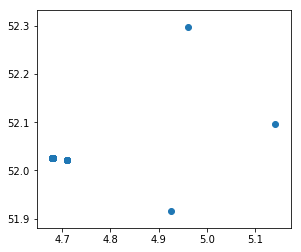

In [55]:
gdf.plot()

In [59]:
#gdf.to_file(r'C:\Users\hoek.HKV\Desktop\locations_acacia3.geo.json', driver='GeoJSON')
gdf.to_file(r'C:\Users\hoek.HKV\Desktop\locations_acacia3.shp')

In [60]:
gdf.to_csv(r'C:\Users\hoek.HKV\Desktop\locations_acacia3.csv')